## 개인 프로젝트 
### 주성분 분석 및 랜덤포레스트를 통해 주요 feature를 알아보고 회귀모델 추정
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import koreanize_matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('데이터/NEW-DATA-1.T15.csv')
df

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,...,14:Meteo_Exterior_Viento,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor
0,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,...,1.426250,9690.24,12604.20,95436.800,758.8800,0,0,0,18.1150,48.3750
1,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,...,1.592000,11022.00,10787.20,95436.800,762.0690,0,0,0,18.4147,47.8080
2,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,...,1.891330,13960.50,9669.63,95398.600,766.2510,0,0,0,18.8533,47.4320
3,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,...,1.828000,18511.20,9648.13,95360.300,766.0370,0,0,0,19.2907,47.0240
4,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,...,2.360710,26349.00,9208.32,95354.900,762.7430,0,0,0,19.7400,45.4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,12.9400,0.0,...,0.074667,0.00,0.00,0.000,-3.4340,0,0,0,16.6180,49.2960
2760,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,19.3200,0.0,...,0.000000,465.92,2716.67,523.264,3.8520,0,0,0,16.4013,50.0373
2761,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,23.2427,0.0,...,0.310667,3454.98,16203.80,3347.460,26.8300,0,0,0,16.2607,50.0587
2762,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,23.4400,0.0,...,0.299333,6795.26,38303.10,7110.660,66.9493,0,0,0,16.2367,49.8400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   3:Temperature_Comedor_Sensor     2764 non-null   float64
 1   4:Temperature_Habitacion_Sensor  2764 non-null   float64
 2   5:Weather_Temperature            2764 non-null   float64
 3   6:CO2_Comedor_Sensor             2764 non-null   float64
 4   7:CO2_Habitacion_Sensor          2764 non-null   float64
 5   8:Humedad_Comedor_Sensor         2764 non-null   float64
 6   9:Humedad_Habitacion_Sensor      2764 non-null   float64
 7   10:Lighting_Comedor_Sensor       2764 non-null   float64
 8   11:Lighting_Habitacion_Sensor    2764 non-null   float64
 9   12:Precipitacion                 2764 non-null   float64
 10  13:Meteo_Exterior_Crepusculo     2764 non-null   float64
 11  14:Meteo_Exterior_Viento         2764 non-null   float64
 12  15:Meteo_Exterior_So

In [5]:
df.columns

Index(['3:Temperature_Comedor_Sensor', '4:Temperature_Habitacion_Sensor',
       '5:Weather_Temperature', '6:CO2_Comedor_Sensor',
       '7:CO2_Habitacion_Sensor', '8:Humedad_Comedor_Sensor',
       '9:Humedad_Habitacion_Sensor', '10:Lighting_Comedor_Sensor',
       '11:Lighting_Habitacion_Sensor', '12:Precipitacion',
       '13:Meteo_Exterior_Crepusculo', '14:Meteo_Exterior_Viento',
       '15:Meteo_Exterior_Sol_Oest', '16:Meteo_Exterior_Sol_Est',
       '17:Meteo_Exterior_Sol_Sud', '18:Meteo_Exterior_Piranometro',
       '19:Exterior_Entalpic_1', '20:Exterior_Entalpic_2',
       '21:Exterior_Entalpic_turbo', '22:Temperature_Exterior_Sensor',
       '23:Humedad_Exterior_Sensor'],
      dtype='object')

In [6]:
len(df.columns)

21

feature의 개수가 21개이므로 주성분 분석 실행

In [8]:
# 데이터 지정 

from sklearn.preprocessing import StandardScaler

target_column = '5:Weather_Temperature'
x = df[df.columns.drop([target_column])]
y = df[[target_column]]

In [9]:
# 데이터 표준화 

from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

In [10]:
x_scaled

array([[-0.35481723, -0.35358727,  0.29898394, ...,  0.        ,
         0.34931663, -0.58437731],
       [-0.25814023, -0.24964025,  0.42429937, ...,  0.        ,
         0.42645618, -0.62793488],
       [-0.1515782 , -0.13761003,  0.40417194, ...,  0.        ,
         0.5393471 , -0.65681962],
       ...,
       [ 0.60816701,  0.62320279, -0.66772458, ...,  0.        ,
        -0.12796023, -0.4550336 ],
       [ 0.58058006,  0.60097401, -0.62706274, ...,  0.        ,
        -0.13413758, -0.47183438],
       [ 0.54787533,  0.57261193, -0.62587877, ...,  0.        ,
        -0.12144829, -0.43659654]])

In [11]:
feature = x.T

# 공분산 행렬 
convariance_matrix = np.cov(feature)
print(convariance_matrix)

[[ 8.14140482e+00  7.97678457e+00  3.87281760e+00  2.34017286e+00
  -5.13296593e+00 -8.88498647e+00  1.97780604e+00 -4.64773153e+00
  -1.59387608e-01  4.06343289e+01  6.62131246e-01  2.46779355e+04
  -1.76830924e+04 -3.64760063e+03  7.46905504e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.49089691e+00 -2.08208008e+01]
 [ 7.97678457e+00  7.95904469e+00  4.67964615e+00  4.51336573e+00
  -5.11428445e+00 -8.91043862e+00  4.55263747e+00  2.69043627e-01
  -1.53147795e-01  5.92948705e+01  7.22946061e-01  2.45595913e+04
  -1.65145903e+04  6.65004656e+00  1.03468493e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.46540089e+00 -2.01901198e+01]
 [ 3.87281760e+00  4.67964615e+00  7.30766112e+02  7.12279215e+02
  -8.36549514e-01 -5.55099656e+00  1.60640926e+02  2.45448240e+02
  -4.36519951e-01  1.00534798e+03  9.16355307e-01  1.02817498e+05
   1.39005346e+04  2.26948733e+05  1.81987667e+03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.77962469e+00 -9.93757842e+00]
 [ 2.34

In [12]:
# 분산공분산 행렬을 통해 eigenvalue(고유치)와 고유벡터 계산   
values, vectors = np.linalg.eig(convariance_matrix)

print('고유치 : \n', values)
print()
print()
print('고유 벡터 : \n', vectors)

고유치 : 
 [1.45139313e+09 5.54638391e+08 2.11580229e+08 3.88425469e+04
 3.73162610e+03 1.26110022e+03 2.22223654e+02 5.87053851e+01
 4.77533589e+01 2.60581712e+01 1.71540406e+01 1.17175669e+01
 2.50521137e+00 6.13515528e-01 3.74499656e-01 5.11304472e-02
 2.28227014e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]


고유 벡터 : 
 [[-7.34465859e-08  5.43851381e-05  2.36887443e-05  4.32334416e-04
  -4.18270641e-03  1.52004310e-03  9.20093023e-02  2.61422914e-02
   3.06796257e-02  2.17122251e-01  6.47225647e-02 -4.97742936e-01
  -5.77976852e-02 -3.50602927e-01  2.74967961e-01  6.98846168e-01
  -2.35412259e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.43256057e-06  5.18521311e-05  2.85008080e-05  5.35829349e-04
  -4.15842180e-03  2.27100582e-03  8.92579474e-02  1.18237779e-02
   3.82116084e-02  2.05934185e-01  7.49101919e-02 -5.08341607e-01
  -8.70220337e-02 -2.88049428e-01  2.90852372e-01 -7.11148715e-01
   5.57299763e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.6157103

In [13]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values))
print(explained_variances)

[0.654471725569717, 0.2501011867072076, 0.09540714664425792, 1.751513641096796e-05, 1.6826893511893491e-06, 5.686635962920998e-07, 1.00206549987448e-07, 2.6471817885479718e-08, 2.1533258291057605e-08, 1.1750321713575044e-08, 7.735212675667691e-09, 5.2837622355427414e-09, 1.129666368555534e-09, 2.766504518025699e-10, 1.6887184471126874e-10, 2.3056077106013192e-11, 1.0291362413394796e-11, 0.0, 0.0, 0.0]


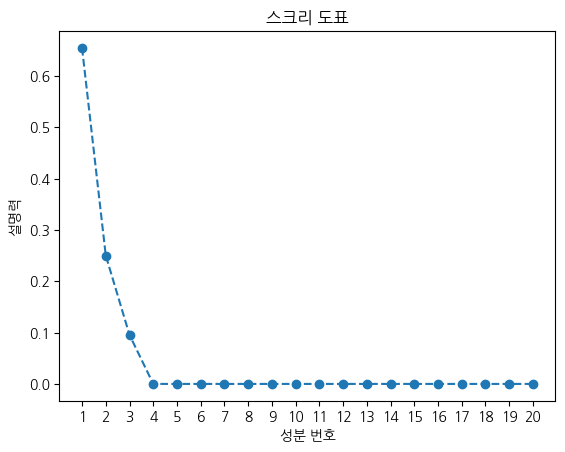

In [14]:
# 스크리 도표

plt.plot(explained_variances, 'o--')
plt.xticks(range(0,len(explained_variances)), range(1,len(explained_variances)+1))
plt.title('스크리 도표')
plt.ylabel('설명력')
plt.xlabel('성분 번호')
plt.show()

-> 스크리 도표에서 4번째에서 크게 꺾이지만 -1 성분으로 3번째까지 추출

In [15]:
principal_num = int(input('사용할 주성분의 개수를 선택하시오 : '))

columns = []

for i in range(principal_num):
    variable = f'principal component{i}'
    columns.append(variable)

columns


['principal component0', 'principal component1', 'principal component2']

In [16]:
# 주성분 분석 수행 

from sklearn.decomposition import PCA 

pca = PCA(n_components=principal_num)

# 주성분 점수 
principal_components = pca.fit_transform(x_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=columns)

In [17]:
principal_df

,principal component0,principal component1,principal component2
0,3.562048,1.452999,-0.451706
1,3.681128,1.307283,-0.375756
2,3.841011,1.139155,-0.387996
3,3.936847,0.981582,-0.383059
4,4.218355,0.786209,-0.422593
...,...,...,...
2759,-1.010066,-1.864450,-0.680628
2760,-0.755494,-1.610262,-0.771668
2761,-0.361051,-1.286660,-0.946332
2762,-0.046064,-0.942451,-1.165674


In [18]:
# 각 변수들이 주성분에 기여하는지 알 수 있는 행렬 

pca.components_

array([[ 0.15208172,  0.16424379,  0.11354709,  0.10372762, -0.11561887,
        -0.153934  ,  0.34830079,  0.33377823, -0.07616407,  0.29893598,
         0.27368382,  0.27271361,  0.16770893,  0.34631092,  0.37345906,
        -0.        , -0.        , -0.        ,  0.2738781 , -0.22244183],
       [-0.42458908, -0.41340193,  0.06353425,  0.065582  ,  0.27766176,
         0.31025267,  0.1923462 ,  0.23303303,  0.09018464,  0.14624628,
        -0.00512275, -0.06120923,  0.26448827,  0.22861988,  0.16991025,
         0.        ,  0.        ,  0.        , -0.28865238,  0.32882563],
       [ 0.16394379,  0.16883194,  0.56068113,  0.56054514,  0.29995848,
         0.26206235,  0.00453027, -0.04464638, -0.1816835 , -0.09514866,
        -0.1148386 ,  0.05311313, -0.22366526, -0.03541915, -0.01495154,
        -0.        , -0.        , -0.        ,  0.13664849,  0.16471295]])

In [19]:
pca.n_features_in_

20

In [20]:
coordinate = []
for i in range(pca.n_features_in_):
    pr_list = []
    for j in range(principal_num):
        pr_list.append(pca.components_[j,i])
    coordinate.append(pr_list)

In [21]:
x.columns

Index(['3:Temperature_Comedor_Sensor', '4:Temperature_Habitacion_Sensor',
       '6:CO2_Comedor_Sensor', '7:CO2_Habitacion_Sensor',
       '8:Humedad_Comedor_Sensor', '9:Humedad_Habitacion_Sensor',
       '10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor',
       '12:Precipitacion', '13:Meteo_Exterior_Crepusculo',
       '14:Meteo_Exterior_Viento', '15:Meteo_Exterior_Sol_Oest',
       '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud',
       '18:Meteo_Exterior_Piranometro', '19:Exterior_Entalpic_1',
       '20:Exterior_Entalpic_2', '21:Exterior_Entalpic_turbo',
       '22:Temperature_Exterior_Sensor', '23:Humedad_Exterior_Sensor'],
      dtype='object')

In [22]:
coordinate

[[0.1520817177043163, -0.4245890816292063, 0.1639437850386174],
 [0.16424378826028038, -0.4134019304019497, 0.1688319374209994],
 [0.11354708649975477, 0.06353424504936249, 0.5606811257300806],
 [0.10372761975751447, 0.0655820006126008, 0.5605451353206361],
 [-0.1156188687057134, 0.27766175537157933, 0.2999584836471021],
 [-0.1539339995378992, 0.31025267447927146, 0.2620623492403387],
 [0.34830078837467526, 0.19234619988333743, 0.004530271058081775],
 [0.3337782258136996, 0.2330330288160391, -0.04464638067365081],
 [-0.07616406674038732, 0.0901846396461221, -0.18168350150606535],
 [0.2989359830378078, 0.14624627945459762, -0.0951486609524454],
 [0.2736838184549249, -0.005122748799039312, -0.11483859687596834],
 [0.27271361450358783, -0.06120922761398131, 0.05311312595243074],
 [0.167708930965575, 0.2644882730193571, -0.22366526342750676],
 [0.34631092157934984, 0.22861987647252874, -0.03541915240739387],
 [0.3734590610506938, 0.1699102500883084, -0.01495154341114843],
 [-0.0, 0.0, -0.0

In [23]:
# 성분 도표 출력 

if principal_num ==2 : 
    for i in range(pca.n_features_in_):

        coordinate_x = coordinate[i][0]
        coordinate_y = coordinate[i][1]

        plt.scatter(coordinate_x,coordinate_y, label=x.columns[i])

    plt.xlabel('principal 1')
    plt.ylabel('principal 2')

    plt.legend(loc='center left',  bbox_to_anchor=(1.1,0.5))
    plt.show()

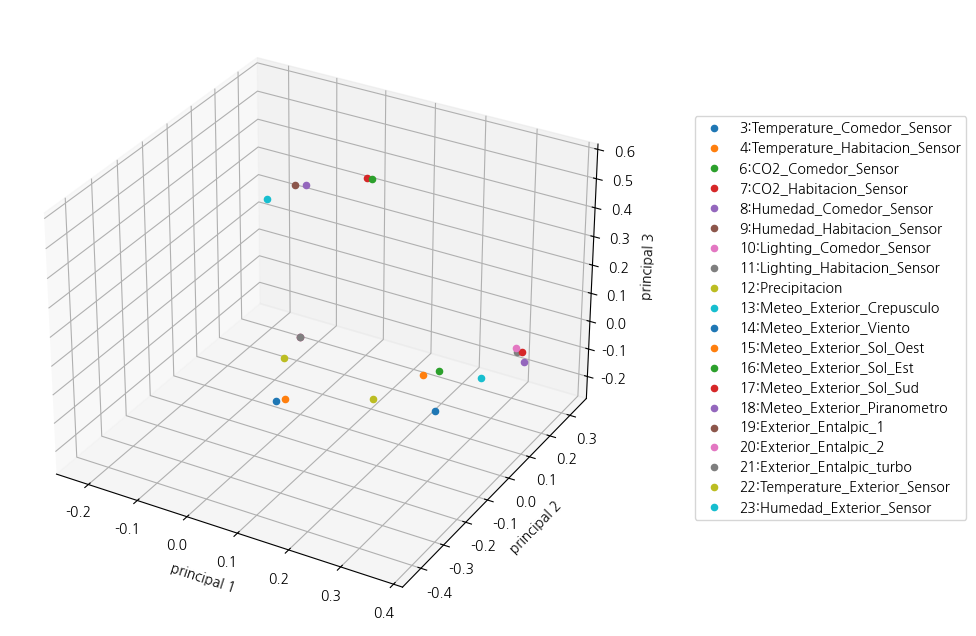

In [24]:
# 성분도표 출력 

if principal_num >=3 :

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(pca.n_features_in_):

        coordinate_x = coordinate[i][0]
        coordinate_y = coordinate[i][1]
        coordinate_z = coordinate[i][2]

        ax.scatter(coordinate_x,coordinate_y,coordinate_z, label=x.columns[i])

    ax.set_xlabel('principal 1')
    ax.set_ylabel('principal 2')
    ax.set_zlabel('principal 3')

    plt.legend(loc='center left',  bbox_to_anchor=(1.1,0.5))
    plt.show()


In [25]:
# 절대값이 0.3보다 작으면 영향이 없다고 간주 

pca_list = pca.components_

for i in range(len(pca_list)):
    for j in range(pca.n_features_in_):
        if abs(pca_list[i][j]) < 0.3:
            pca_list[i][j] = 0
        else:
            pass 

In [26]:
pca_list

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.34830079,  0.33377823,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.34631092,  0.37345906,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.42458908, -0.41340193,  0.        ,  0.        ,  0.        ,
         0.31025267,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.32882563],
       [ 0.        ,  0.        ,  0.56068113,  0.56054514,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [27]:
list(x.columns)

['3:Temperature_Comedor_Sensor',
 '4:Temperature_Habitacion_Sensor',
 '6:CO2_Comedor_Sensor',
 '7:CO2_Habitacion_Sensor',
 '8:Humedad_Comedor_Sensor',
 '9:Humedad_Habitacion_Sensor',
 '10:Lighting_Comedor_Sensor',
 '11:Lighting_Habitacion_Sensor',
 '12:Precipitacion',
 '13:Meteo_Exterior_Crepusculo',
 '14:Meteo_Exterior_Viento',
 '15:Meteo_Exterior_Sol_Oest',
 '16:Meteo_Exterior_Sol_Est',
 '17:Meteo_Exterior_Sol_Sud',
 '18:Meteo_Exterior_Piranometro',
 '19:Exterior_Entalpic_1',
 '20:Exterior_Entalpic_2',
 '21:Exterior_Entalpic_turbo',
 '22:Temperature_Exterior_Sensor',
 '23:Humedad_Exterior_Sensor']

In [28]:
x.columns.to_list()

['3:Temperature_Comedor_Sensor',
 '4:Temperature_Habitacion_Sensor',
 '6:CO2_Comedor_Sensor',
 '7:CO2_Habitacion_Sensor',
 '8:Humedad_Comedor_Sensor',
 '9:Humedad_Habitacion_Sensor',
 '10:Lighting_Comedor_Sensor',
 '11:Lighting_Habitacion_Sensor',
 '12:Precipitacion',
 '13:Meteo_Exterior_Crepusculo',
 '14:Meteo_Exterior_Viento',
 '15:Meteo_Exterior_Sol_Oest',
 '16:Meteo_Exterior_Sol_Est',
 '17:Meteo_Exterior_Sol_Sud',
 '18:Meteo_Exterior_Piranometro',
 '19:Exterior_Entalpic_1',
 '20:Exterior_Entalpic_2',
 '21:Exterior_Entalpic_turbo',
 '22:Temperature_Exterior_Sensor',
 '23:Humedad_Exterior_Sensor']

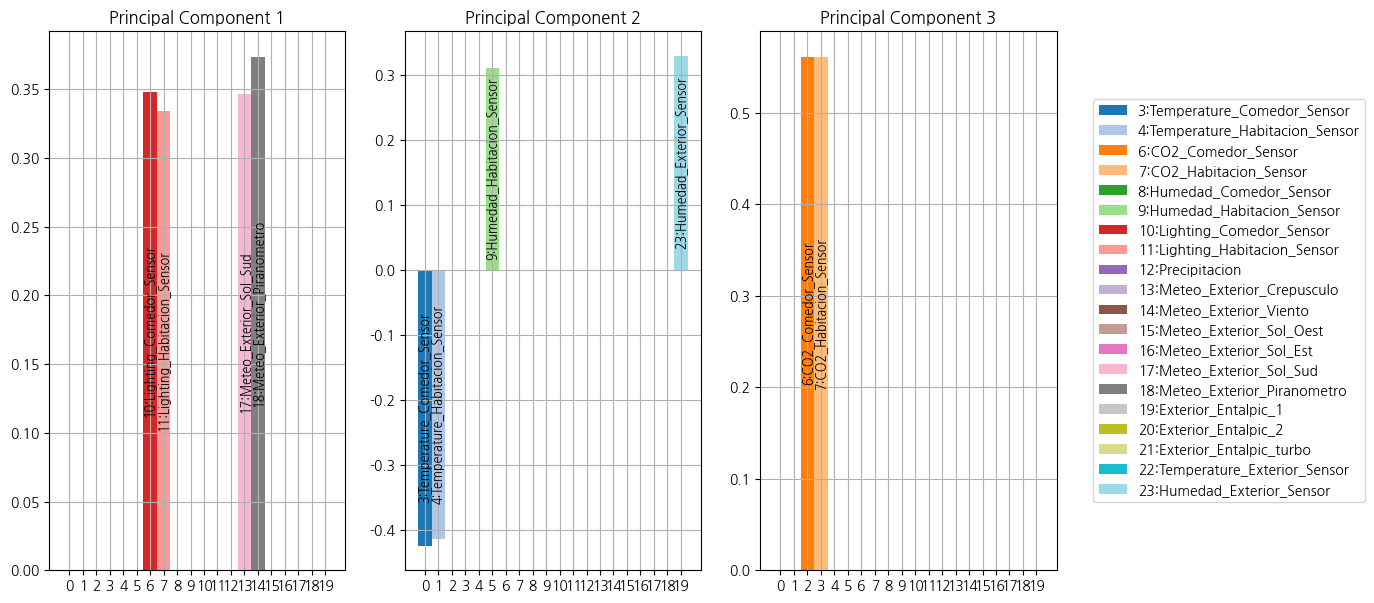

In [29]:
# 각 주성분에 많은 영향 미치는 피처 

colors = plt.cm.tab20(np.linspace(0, 1, pca.n_features_in_))

fig = plt.figure(figsize=(13,7))

for i in range(principal_num):
    ax = fig.add_subplot(1, principal_num, i + 1)
    bars = ax.bar(range(pca.n_features_in_), pca_list[i], color=colors, label=list(x.columns), width=1.0)
    ax.set_xticks(range(0,pca.n_features_in_))
    ax.grid()
    ax.set_title(f'Principal Component {i + 1}')

    for j, bar in enumerate(bars):
        if pca_list[i][j] != 0:  # Only add label if value is non-zero
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position
                bar.get_height() / 2,  # Y position (middle of the bar)
                list(x.columns)[j],  # Text to display
                ha='center', 
                va='center', 
                rotation='vertical', 
                fontsize=9, 
                color='black' if pca_list[i][j] > 0 else 'black'  # Text color for visibility
            )

plt.legend(loc='center left',  bbox_to_anchor=(1.1,0.5))
plt.show()


In [30]:
principal_components

array([[ 3.56204825,  1.45299943, -0.45170613],
       [ 3.68112849,  1.30728345, -0.37575606],
       [ 3.84101124,  1.13915534, -0.38799575],
       ...,
       [-0.36105067, -1.28665965, -0.94633208],
       [-0.04606373, -0.94245057, -1.16567418],
       [ 0.28420783, -0.71862054, -1.35748255]])

In [31]:
# 주성분 점수로 시각화 

if principal_num == 2:

    plt.scatter(principal_components[:,0], principal_components[:,1])

    plt.xlabel('principal 1')
    plt.ylabel('principal 2')

    plt.show()
    

C:\Users\sh321\AppData\Local\Temp\ipykernel_13712\2202250887.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left',  bbox_to_anchor=(1.1,0.5))


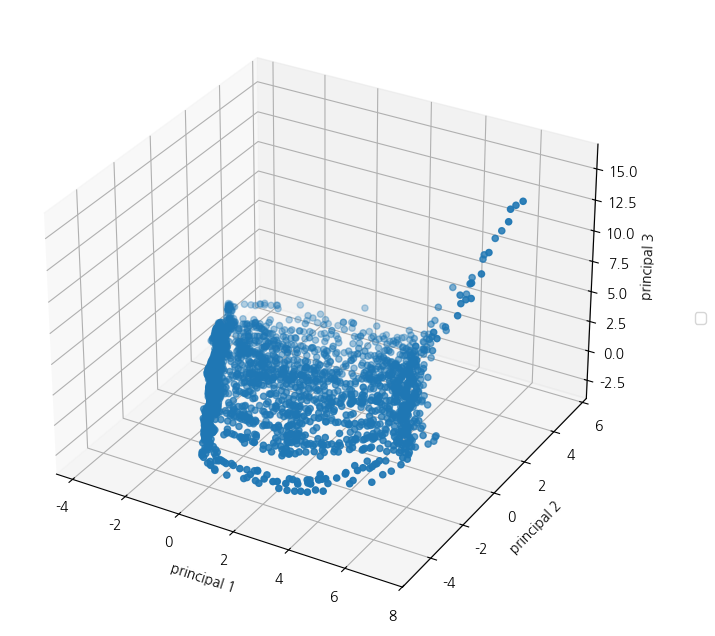

In [32]:
# 주성분 점수로 시각화

if principal_num >= 3:

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(principal_components[:,0], principal_components[:,1], principal_components[:,2])

    ax.set_xlabel('principal 1')
    ax.set_ylabel('principal 2')
    ax.set_zlabel('principal 3')

    plt.legend(loc='center left',  bbox_to_anchor=(1.1,0.5))
    plt.show()

In [33]:
def make_linear_equation(model, names):
    intercept = model.intercept_[0]
    coefs = model.coef_[0]

    terms = []
    for coef, name in zip(coefs, names):
        if abs(coef) < 1e-6:
            continue
        latex_name = name.replace(" ", "")
        terms.append(f"{coef:+.3f}{latex_name}")

    body = " ".join(terms)

    print()
    print(f'[회귀식]')
    print(rf"y = {intercept:.3f}{body}")


In [34]:
def make_poly_equation(model, feature_names, terms_per_line=6):
    intercept = model.intercept_[0]
    coefs = model.coef_[0]

    from collections import defaultdict
    terms_by_degree = defaultdict(list)

    for coef, name in zip(coefs, feature_names):
        
        # 차수 구분 (^ 기준)
        if "^4" in name:
            degree = 4
        elif "^3" in name:
            degree = 3
        elif "^2" in name:
            degree = 2
        else:
            degree = 1

        latex_name = name.replace(" ", "")
        terms_by_degree[degree].append(f"{coef:+.3f}{latex_name}")

    lines = []
    lines.append(f"y = {intercept:.3f}")

    for degree in sorted(terms_by_degree.keys()):
        terms = terms_by_degree[degree]

        for i in range(0, len(terms), terms_per_line):
            chunk = " ".join(terms[i:i+terms_per_line])
            lines.append(f" {chunk}")

    body = "\n".join(lines)

    print()
    print(f'[회귀식]')
    print(body)


In [35]:
# 모델 생성 및 회귀식 추정

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=12)

## 선형 회귀

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

print('------------선형 회귀---------------')
lin_score = model.score(x_test, y_test)
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)

print(f'score :', lin_score)
print(f'mse :', mse)
print(f'mae :', mae)

## 다항 회귀 

x_train, x_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=12)

degrees = range(1,16)
poly_score = [0,]
poly_mse = [0,]
poly_mae = [0,]

for i in range(1,len(degrees)):
    poly = PolynomialFeatures(include_bias=False, degree=degrees[i])
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)

    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)
    y_pred_poly = poly_reg.predict(x_poly_test)

    poly_score.append(poly_reg.score(x_poly_test, y_test))
    poly_mse.append(mean_squared_error(y_test, y_pred_poly))
    poly_mae.append(mean_absolute_error(y_test, y_pred_poly))


# 최대값 인덱스 찾기
max_index = poly_score.index(max(poly_score))

print()
print(f'다항 회귀 사용 시 {max_index}차 회귀를 추천합니다!')

print()
print(f'------------{max_index}차 다항 회귀---------------')
print(f'score :', poly_score[max_index])
print(f'mse :', poly_mse[max_index])
print(f'mae :', poly_mae[max_index])


if lin_score < max(poly_score):
    poly = PolynomialFeatures(include_bias=False, degree=max_index)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)

    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)
    y_pred_poly = poly_reg.predict(x_poly_test)

    print()
    print(f'------------{max_index}차 다항 회귀---------------')
    print(f'회귀계수 : ', poly_reg.coef_)
    print(f'절편 : ', poly_reg.intercept_)

    feature_names = poly.get_feature_names_out(columns)

    make_poly_equation(poly_reg, feature_names)

else:
    model = LinearRegression()
    model.fit(x_train, y_train)
    predict = model.predict(x_test)

    print()
    print('------------선형 회귀---------------')
    print(f'회귀계수 : ', model.coef_)
    print(f'절편 : ', model.intercept_)

    make_linear_equation(model, columns)


------------선형 회귀---------------
score : 0.6143129244413752
mse : 6.491661780694637
mae : 2.041226488062429

다항 회귀 사용 시 4차 회귀를 추천합니다!

------------4차 다항 회귀---------------
score : 0.7379536429025846
mse : 4.410612719328676
mae : 1.5299391328142775

------------4차 다항 회귀---------------
회귀계수 :  [[ 1.46595614e+00 -1.32591147e+00  1.78987201e+00 -1.10438057e-01
   5.77619725e-03 -2.10771142e-01  5.65778997e-02  2.65950151e-01
   9.24880934e-01  2.36595221e-03  1.08540551e-01 -1.08350180e-01
   8.13293071e-02 -7.81526733e-02 -2.87841120e-01  2.42730834e-02
   3.20001435e-02 -5.39569143e-03 -5.85042812e-02  4.33556439e-03
  -1.72920058e-02  2.59860907e-02 -2.01071065e-02 -2.73556179e-02
  -3.26523617e-03 -1.62822615e-02  7.05901583e-03  5.85799559e-02
   2.81290179e-02  1.17219749e-04 -8.77336398e-03 -3.50513107e-02
  -3.02537973e-03 -6.89542679e-03]]
절편 :  [13.40103887]

[회귀식]
y = 13.401
 +1.466principalcomponent0 -1.326principalcomponent1 +1.790principalcomponent2 +0.006principalcomponent0pr

In [36]:
model.coef_[0]* x_train 

,principal component0,principal component1,principal component2
2563,-2.256233,0.503886,-0.136161
534,-0.773308,2.792393,-0.428445
422,-1.345220,1.932532,0.157503
1889,-1.823632,1.008343,0.079407
2006,0.824144,-1.572503,0.125842
...,...,...,...
1987,-2.641491,-0.219984,0.326928
1283,-1.806371,1.116330,0.349483
1414,-3.017309,-0.896645,0.017991
1691,-0.817230,2.627595,-0.079266


In [37]:
model.coef_[0]* x_train 

,principal component0,principal component1,principal component2
2563,-2.256233,0.503886,-0.136161
534,-0.773308,2.792393,-0.428445
422,-1.345220,1.932532,0.157503
1889,-1.823632,1.008343,0.079407
2006,0.824144,-1.572503,0.125842
...,...,...,...
1987,-2.641491,-0.219984,0.326928
1283,-1.806371,1.116330,0.349483
1414,-3.017309,-0.896645,0.017991
1691,-0.817230,2.627595,-0.079266
